In [13]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [14]:
data = pd.read_csv('orders.csv')
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [15]:
data['DayTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'], format='%Y-%m-%d')


In [16]:
data = data.loc[(data['DayTime_CartFinalize'] > '2015-12-30')
                     & (data['DayTime_CartFinalize'] < '2016-12-30')]


In [17]:
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,DayTime_CartFinalize
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,2016-06-14 00:30:08
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,2016-05-21 11:51:02
10,4605740,637880,138296,2016-08-02 10:48:18.000,469358.0,تهران,1.0,2016-08-02 10:48:18
11,5623610,2827566,23927,2016-12-04 03:12:59.000,108000.0,لالی,1.0,2016-12-04 03:12:59
14,4851441,3105577,183721,2016-08-31 13:27:44.000,23853.0,تهران,1.0,2016-08-31 13:27:44


In [18]:
LastDay = max(data['DayTime_CartFinalize'])
LastDay

Timestamp('2016-12-29 23:59:42')

In [19]:
min(data['DayTime_CartFinalize'])

Timestamp('2015-12-30 00:08:26')

In [20]:
data.shape

(39056, 8)

In [21]:
data_describe = data.filter(['Amount_Gross_Order', 'Quantity_item'])

In [22]:
data_describe.describe()

,Amount_Gross_Order,Quantity_item
count,3.905600e+04,39056.000000
mean,1.373214e+06,1.284387
std,3.747109e+06,2.961073
min,0.000000e+00,1.000000
25%,1.040000e+05,1.000000
50%,2.844040e+05,1.000000
75%,1.000000e+06,1.000000
max,9.495000e+07,500.000000


In [23]:
data_describe.corr()

,Amount_Gross_Order,Quantity_item
Amount_Gross_Order,1.000000,-0.024245
Quantity_item,-0.024245,1.000000


In [24]:
Recency = data.groupby('ID_Customer')['DayTime_CartFinalize'].apply( lambda x: (LastDay - x.max()).days)
Recency = Recency.reset_index()
Recency.head()

,ID_Customer,DayTime_CartFinalize
0,466132,113
1,466141,285
2,466146,312
3,466204,215
4,466211,137


In [25]:
Frequency = data.groupby('ID_Customer')['ID_Order'].count()
Frequency = Frequency.reset_index()
Frequency.head()

,ID_Customer,ID_Order
0,466132,1
1,466141,1
2,466146,1
3,466204,2
4,466211,1


In [26]:
RFM1 = pd.merge(Recency, Frequency, on='ID_Customer', how = 'inner' )
RFM1.head()

,ID_Customer,DayTime_CartFinalize,ID_Order
0,466132,113,1
1,466141,285,1
2,466146,312,1
3,466204,215,2
4,466211,137,1


In [27]:
Monetary = data.groupby('ID_Customer')['Amount_Gross_Order'].sum()
Monetary = Monetary.reset_index()
Monetary.head()

,ID_Customer,Amount_Gross_Order
0,466132,15000.0
1,466141,541284.0
2,466146,302752.0
3,466204,5086697.0
4,466211,432844.0


In [28]:
RFM = pd.merge(RFM1, Monetary, on='ID_Customer', how = 'inner' )
RFM.head()

,ID_Customer,DayTime_CartFinalize,ID_Order,Amount_Gross_Order
0,466132,113,1,15000.0
1,466141,285,1,541284.0
2,466146,312,1,302752.0
3,466204,215,2,5086697.0
4,466211,137,1,432844.0


In [29]:
RFM.columns = ['ID_Customer','Recency', 'Frequency', 'Monetary']
RFM.head()

,ID_Customer,Recency,Frequency,Monetary
0,466132,113,1,15000.0
1,466141,285,1,541284.0
2,466146,312,1,302752.0
3,466204,215,2,5086697.0
4,466211,137,1,432844.0


In [30]:
rfm_df = RFM[['Recency', 'Frequency', 'Monetary']]

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,10))
rfm_N = scaler.fit_transform(rfm_df)

In [32]:
rfm_N

array([[3.78630137, 1.        , 1.00088627],
       [8.02739726, 1.        , 1.03198148],
       [8.69315068, 1.        , 1.01788794],
       ...,
       [1.02465753, 1.        , 2.51180378],
       [1.        , 1.        , 1.13334664],
       [1.        , 1.        , 1.00460753]])

In [33]:
rfm_df_scaled = pd.DataFrame(rfm_N)
rfm_df_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_df_scaled.head()

,Recency,Frequency,Monetary
0,3.786301,1.000000,1.000886
1,8.027397,1.000000,1.031981
2,8.693151,1.000000,1.017888
3,6.301370,1.272727,1.300545
4,4.378082,1.000000,1.025574


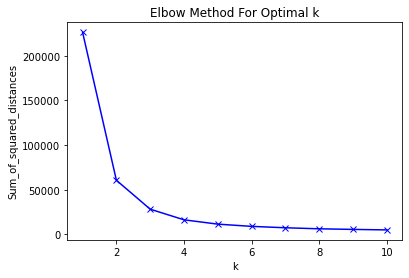

In [43]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rfm_df_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [44]:
km = KMeans(n_clusters= 6 ,init='k-means++', max_iter=300 )
km = km.fit(rfm_df_scaled)
km

KMeans(n_clusters=6)

In [45]:
km.labels_

array([5, 3, 3, ..., 4, 4, 4])

In [46]:
RFM['Cluster_Id'] = km.labels_
RFM.head()

,ID_Customer,Recency,Frequency,Monetary,Cluster_Id
0,466132,113,1,15000.0,5
1,466141,285,1,541284.0,3
2,466146,312,1,302752.0,3
3,466204,215,2,5086697.0,0
4,466211,137,1,432844.0,5


<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

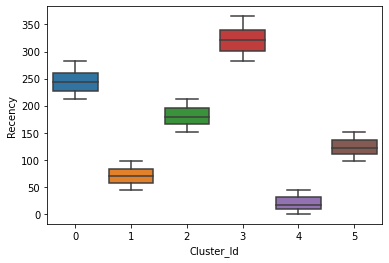

In [47]:
sns.boxplot(x='Cluster_Id', y='Recency', data=RFM)


<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

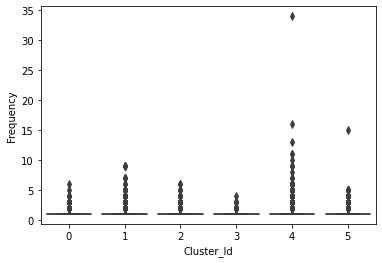

In [48]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=RFM)


<AxesSubplot:xlabel='Cluster_Id', ylabel='Monetary'>

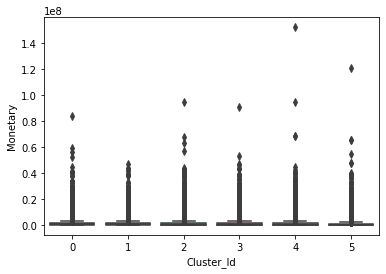

In [49]:
sns.boxplot(x='Cluster_Id', y='Monetary', data=RFM)


In [58]:
RFM.shape

(33772, 5)

In [59]:
RFM[RFM['Cluster_Id'] == 0].shape

(4889, 5)

In [60]:
RFM[RFM['Cluster_Id'] == 1].shape

(5406, 5)

In [61]:
RFM[RFM['Cluster_Id'] == 2].shape

(5393, 5)

In [62]:
RFM[RFM['Cluster_Id'] == 3].shape

(5711, 5)

In [63]:
RFM[RFM['Cluster_Id'] == 4].shape

(6110, 5)

In [64]:
RFM[RFM['Cluster_Id'] == 5].shape

(6263, 5)

In [65]:
RFM.describe()

,ID_Customer,Recency,Frequency,Monetary,Cluster_Id
count,3.377200e+04,33772.000000,33772.000000,3.377200e+04,33772.000000
mean,2.220037e+06,156.255685,1.156461,1.588069e+06,2.637688
std,1.318906e+06,104.315592,0.548424,4.187714e+06,1.701293
min,4.661320e+05,0.000000,1.000000,0.000000e+00,0.000000
25%,9.269652e+05,66.000000,1.000000,1.292660e+05,1.000000
50%,2.435522e+06,143.000000,1.000000,3.669720e+05,3.000000
75%,3.459064e+06,240.000000,1.000000,1.251422e+06,4.000000
max,4.580360e+06,365.000000,34.000000,1.523243e+08,5.000000


In [66]:
RFM.corr()

,ID_Customer,Recency,Frequency,Monetary,Cluster_Id
ID_Customer,1.000000,-0.119381,-0.076878,0.004985,0.036716
Recency,-0.119381,1.000000,-0.158126,0.015580,-0.292300
Frequency,-0.076878,-0.158126,1.000000,0.143346,0.053840
Monetary,0.004985,0.015580,0.143346,1.000000,-0.016534
Cluster_Id,0.036716,-0.292300,0.053840,-0.016534,1.000000


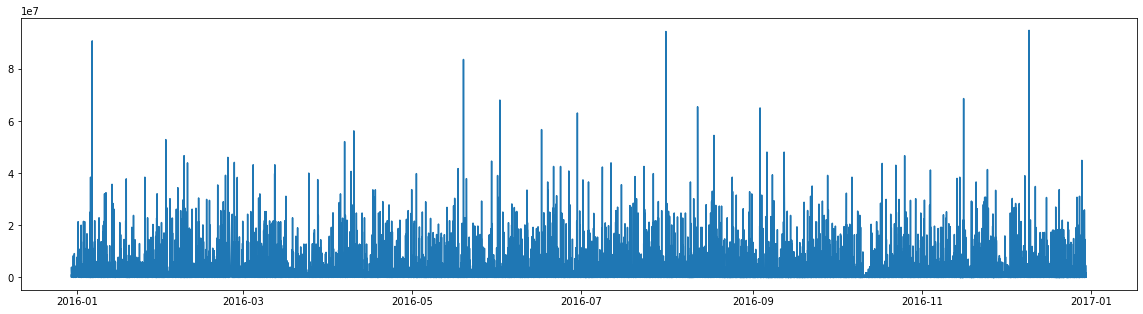

In [50]:
df_average_sales = data.groupby(by=['DayTime_CartFinalize'], as_index=False)['Amount_Gross_Order'].sum()
df_average_saless = df_average_sales.sort_values('Amount_Gross_Order', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales.DayTime_CartFinalize, df_average_sales.Amount_Gross_Order)
plt.show()

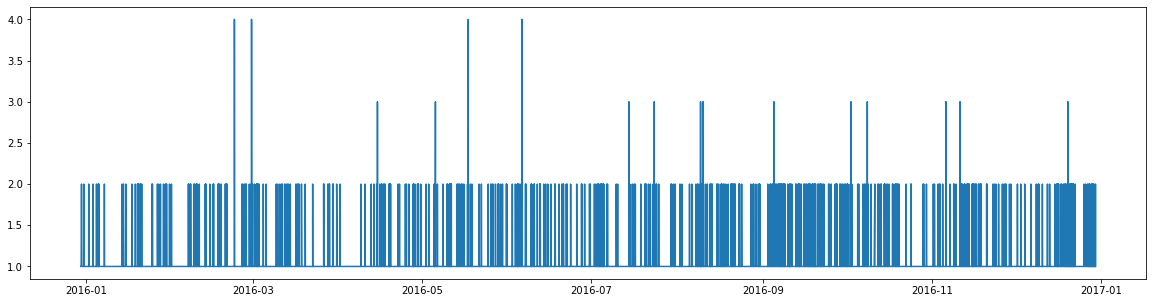

In [51]:
df_average_sales = data.groupby(by=['DayTime_CartFinalize'], as_index=False)['ID_Order'].count()
df_average_saless = df_average_sales.sort_values('ID_Order', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales.DayTime_CartFinalize, df_average_sales.ID_Order)
plt.show()

In [52]:
orders = data.filter(['city_name_fa', 'Quantity_item'])

In [53]:
groups = orders.groupby(by=['city_name_fa'], as_index=False)
groups.first()

,city_name_fa,Quantity_item
0,آب بر,1.0
1,آبادان,1.0
2,آباده,1.0
3,آباده طشک,1.0
4,آبدانان,1.0
...,...,...
589,گوگد,1.0
590,گیلانغرب,2.0
591,گیوی,2.0
592,یاسوج,1.0


In [54]:
orders = groups.sum()
orders.head()

,city_name_fa,Quantity_item
0,آب بر,3.0
1,آبادان,67.0
2,آباده,18.0
3,آباده طشک,1.0
4,آبدانان,9.0


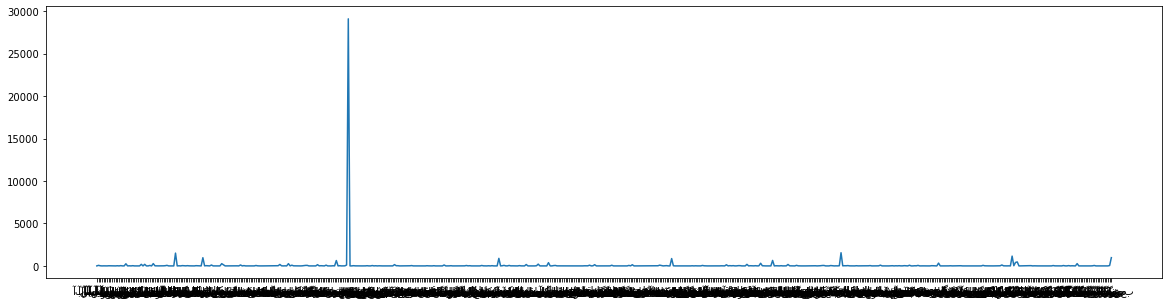

In [55]:
df_average_sales = orders.groupby(by=['city_name_fa'], as_index=False)['Quantity_item'].sum()
df_average_saless = df_average_sales.sort_values('Quantity_item', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales.city_name_fa, df_average_sales.Quantity_item)
plt.show()

In [56]:
orders[orders['Quantity_item'] == orders['Quantity_item'].max()]


,city_name_fa,Quantity_item
147,تهران,29095.0
